In [1]:
import os
import numpy as np
from sklearn.cluster import AffinityPropagation
import distance
import seaborn as sns

sns.set_theme()

dir = "json"
examples = []
for file in os.listdir(dir):
    with open(dir + "/" + file, "r") as f:
        examples.append(f.read())

In [2]:
def plot_lengths(fname):
    with open(fname, "r") as f:
        samples = f.readlines()

    sns.displot(data=[len(e) for e in samples], kde=True, log_scale=True)

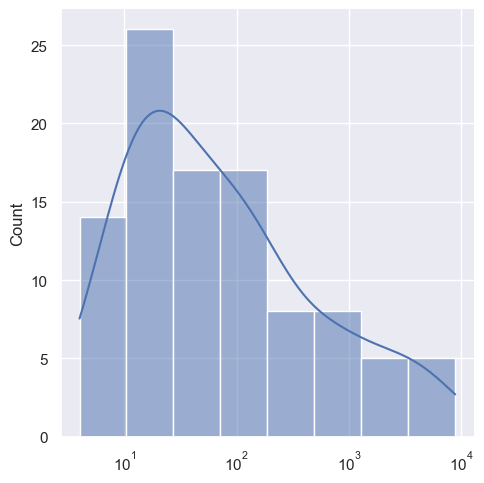

In [3]:
plot_lengths("weighted.json")

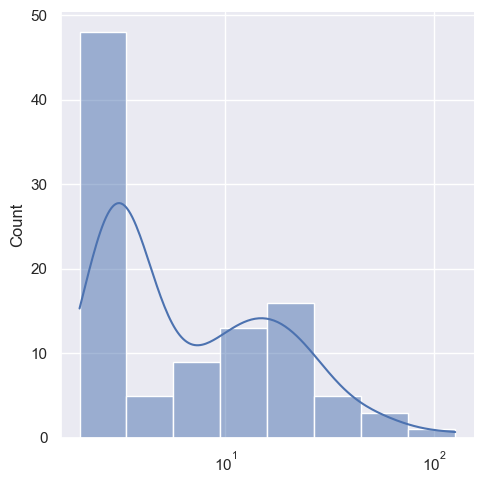

In [4]:
plot_lengths("unweighted.json")

In [5]:
def letter_dist(s):
    m = {}
    for c in s:
        m[c] = m.get(c, 0) + 1
    total = sum(m.values())
    for c in m:
        m[c] /= total
    return m

def kl_divergence(p, q):
    return abs(sum([p.get(c, 0) * np.log(p.get(c, 0) / q.get(c, 0)) for c in p | q if (c in p and c in q)]))

def jensen_shannon(p, q):
    m = {}
    for c in p | q:
        m[c] = (p.get(c, 0) + q.get(c, 0)) / 2
    return (kl_divergence(p, m) + kl_divergence(q, m)) / 2

def letter_distribuiton(fname):
    with open(fname, "r") as f:
        samples = f.readlines()
    
    exs = letter_dist("".join(examples))
    sns.displot(data=[jensen_shannon(exs, letter_dist(s)) for s in samples], kde=True)
        
    # sns.displot(data=[len(e) for e in samples], kde=True, log_scale=True)

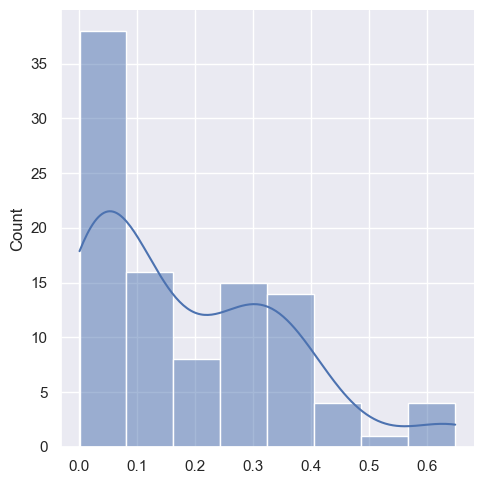

In [6]:
letter_distribuiton("weighted.json")

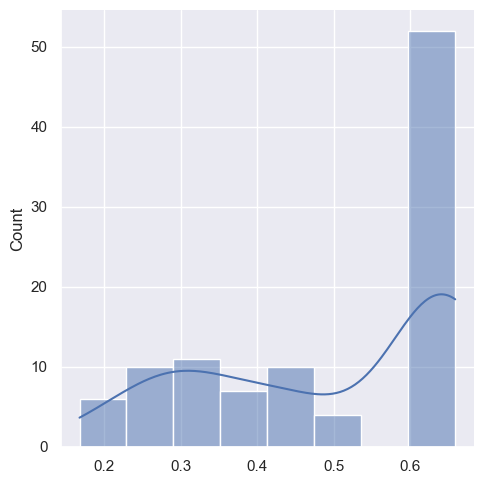

In [7]:
letter_distribuiton("unweighted.json")